In [4]:
# Importing Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load Data
data = pd.read_csv("/IPL Matches 2008-2020_my.csv")
mat_df = pd.read_csv("/matches.csv")

In [12]:
#Give First & Last 5 Rows
data.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [ ]:
# Give First 5 Rows
mat_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# Drop The Method Feature BCZ Most Values Is None
data.drop(["method"],axis = 1,inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


In [ ]:
# Columns Of File
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
# Numbers Of Columns & Rows Of File
data.shape

(816, 16)

In [ ]:
#Totle Matches In Each Season
mat_df["Season"].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2018    60
IPL-2016    60
IPL-2019    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [ ]:
# Number Of Matches Played In Each Vanue
mat_df["city"].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Cuttack             7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
# Toss Decision
teams = data["toss_winner"].unique()
decision_making = pd.DataFrame([], columns= ["Toss Winner", "Decision", "Times"] )

for id, element in enumerate(teams):
  temp_bat = data[(data["toss_winner"]==element) & (data["toss_decision"]=="bat")]
  temp_field = data[(data["toss_winner"]==element) & (data["toss_decision"]=="field")]

  decision_making = decision_making.append({"Toss Winner":element, "Decision":"bat", 
                              "Times":temp_bat["toss_winner"].count()}, ignore_index=True)
  decision_making = decision_making.append({"Toss Winner":element, "Decision":"field", 
                              "Times":temp_field["toss_winner"].count()}, ignore_index=True)

In [ ]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,23
1,Royal Challengers Bangalore,field,64
2,Chennai Super Kings,bat,56
3,Chennai Super Kings,field,41
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,39
7,Mumbai Indians,field,67
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


Text(41.653927879050926, 0.5, 'Toss Decison')

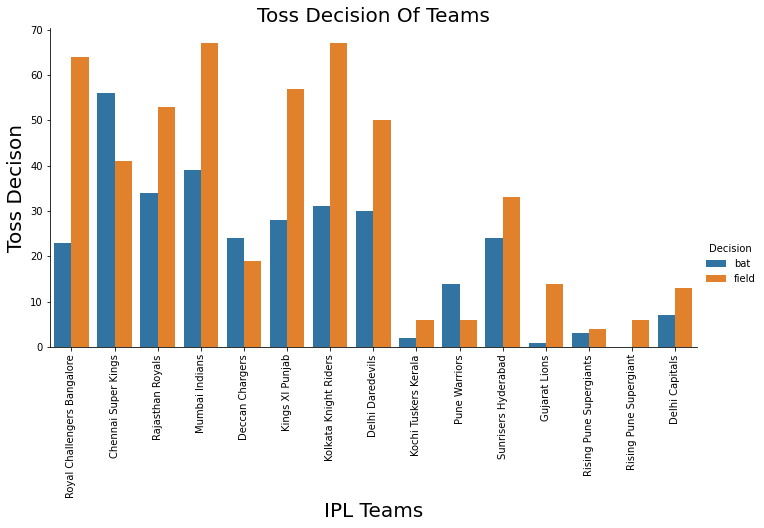

In [ ]:
# Catplot Of Toss Decision
sns.catplot(x= "Toss Winner", y= "Times",hue= "Decision", data = decision_making, kind ="bar", height= 5, aspect= 2 )

plt.title("Toss Decision Of Teams", fontsize = 20)
plt.xticks(rotation = 90)
plt.xlabel("IPL Teams",fontsize = 20)
plt.ylabel("Toss Decison",fontsize = 20)

In [ ]:
# Players Which Wins Man Of Match Award
data["player_of_match"].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
KMA Paul           1
TL Suman           1
R McLaren          1
MS Bisla           1
Name: player_of_match, Length: 233, dtype: int64

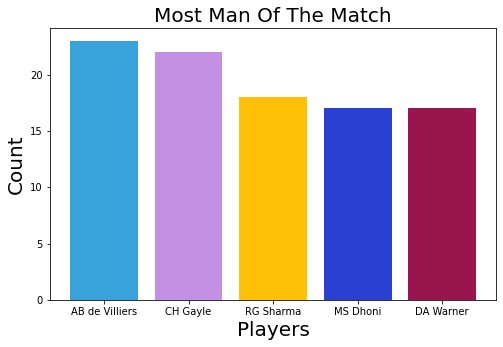

In [ ]:
# Most Man Of The Match
plt.figure(figsize=(8,5))
plt.bar(list(data["player_of_match"].value_counts()[0:5].keys()),list(data["player_of_match"].value_counts()[0:5]),color=["#39A2DB","#C490E4","#FFC107","#2940D3","#99154E"])
plt.title("Most Man Of The Match",fontsize=20)
plt.xlabel("Players",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


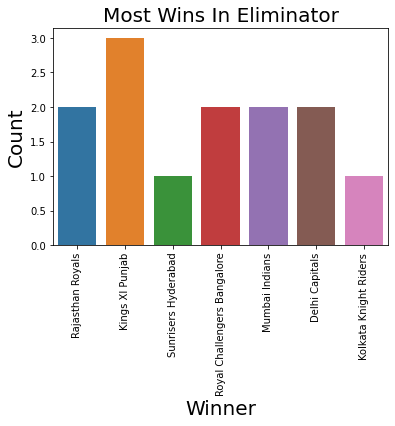

In [ ]:
# Most Wins In Eliminator
sns.countplot(data["winner"][data["eliminator"]== "Y"],data = data)
plt.title("Most Wins In Eliminator", fontsize = 20)
plt.xticks(rotation = 90)
plt.xlabel("Winner",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

In [ ]:
data["winner"].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

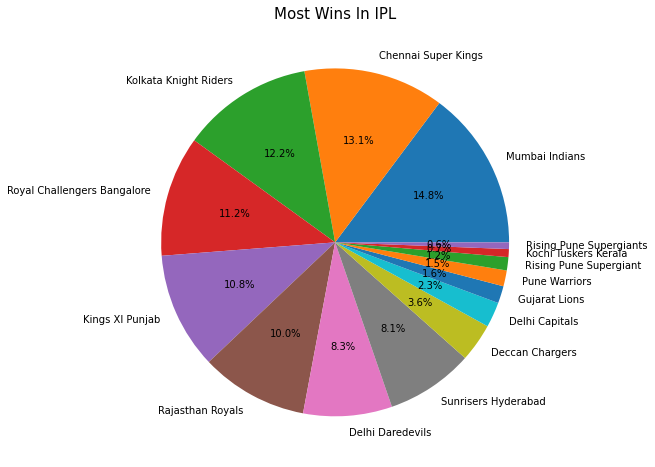

In [ ]:
# Most Wins In IPL
temp = pd.DataFrame({"Winner" : data["winner"]})
count_wins = temp.value_counts()
labels = [x[0] for x in count_wins.keys()]

bar , ax = plt.subplots(figsize=(10,8))
ax = plt.pie(x = count_wins, autopct="%.1f%%" ,labels=labels)
plt.title("Most Wins In IPL", fontsize = 15)
plt.show()

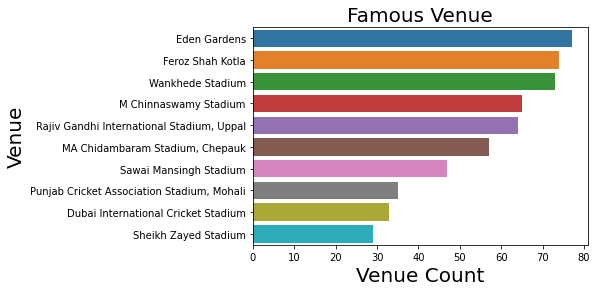

In [ ]:
# Famous Vanue
sns.barplot(x = data["venue"].value_counts().head(10).values,y = data["venue"].value_counts().head(10).index, data = data)
plt.title("Famous Venue", fontsize = 20)
plt.xlabel("Venue Count", fontsize = 20)
plt.ylabel("Venue", fontsize = 20)
plt.show()

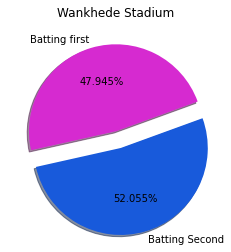

In [ ]:
#Stadium Wise Analysis
stadium=mat_df.loc[(mat_df["venue"]=="Wankhede Stadium") ]
stadium_runs=stadium[stadium["win_by_runs"]>0]
slices=[len(stadium_runs),len(stadium)-len(stadium_runs)]
labels=["Batting first","Batting Second"]
plt.pie(slices,labels=labels,startangle=20,shadow=1,explode=(0,0.2),autopct="%2.3f%%",colors=["#D62AD0","#185ADB"])
plt.title("Wankhede Stadium")
plt.show()

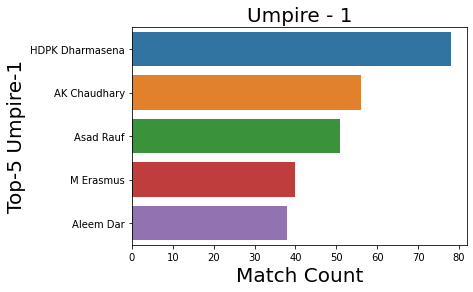

In [ ]:
#Top Umpire-1
sns.barplot(x = data["umpire1"].value_counts().head(5).values,y = data["umpire1"].value_counts().head(5).index, data = data)
plt.title("Umpire - 1", fontsize = 20)
plt.xlabel("Match Count", fontsize = 20)
plt.ylabel("Top-5 Umpire-1", fontsize = 20)
plt.show()

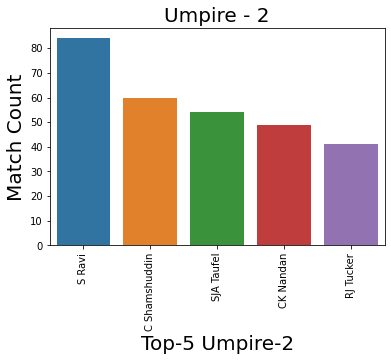

In [ ]:
#Top Umpire-2
sns.barplot(x = data["umpire2"].value_counts().head(5).index,y = data["umpire2"].value_counts().head(5).values, data = data)
plt.title("Umpire - 2", fontsize = 20)
plt.xticks(rotation = 90)
plt.xlabel("Top-5 Umpire-2", fontsize = 20)
plt.ylabel("Match Count", fontsize = 20)
plt.show()